<a href="https://colab.research.google.com/github/HikmetEmre/Comprehensive-Data-Analyses-of-MTA/blob/main/MTA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import dateutil.parser
import datetime
from datetime import timedelta
from datetime import date
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# New section

In [ ]:
download = True

if download:
  dates = ['220402','220409','220416','220423','220430','220507','220514','220521','220528','220604']

  weeks_data = []
  for weeks in dates:
    MTA_url = f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{weeks}.txt"
    weeks_data.append(pd.read_csv(MTA_url))

  MTA_data = pd.concat(weeks_data)
  MTA_data.to_csv('filtred_data.csv')
else:
  filtered_data = pd.read_csv('filtered_data.csv')
  

In [ ]:
MTA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112688 entries, 0 to 211608
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [ ]:
MTA_data.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,20:00:00,REGULAR,7697339,2683928
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,00:00:00,REGULAR,7697362,2683972
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,04:00:00,REGULAR,7697367,2683977
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,08:00:00,REGULAR,7697370,2684008
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2022,12:00:00,REGULAR,7697387,2684073


In [ ]:
MTA_data.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
211604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,05:00:00,REGULAR,0,433
211605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,09:00:00,REGULAR,0,433
211606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,13:00:00,REGULAR,0,433
211607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,17:00:00,REGULAR,0,435
211608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/03/2022,21:00:00,REGULAR,0,435


In [ ]:
MTA_data.describe()

,ENTRIES,EXITS
count,2.112688e+06,2.112688e+06
mean,4.302008e+07,3.465272e+07
std,2.237061e+08,1.974004e+08
min,0.000000e+00,0.000000e+00
25%,2.492210e+05,1.327810e+05
50%,1.352614e+06,8.873720e+05
75%,5.959593e+06,3.975362e+06
max,2.147309e+09,2.122390e+09


In [ ]:
MTA_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [ ]:
MTA_data.rename(columns = {"C/A" : "CA"},inplace = True)
MTA_data.columns = [column.strip() for column in MTA_data.columns]
MTA_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874


In [ ]:
MTA_data.shape

(2112688, 11)

In [ ]:
MTA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112688 entries, 0 to 211608
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 193.4+ MB


In [ ]:
MTA_data.isna().sum()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [ ]:
MTA_data['DATETIME'] = pd.to_datetime(MTA_data['DATE'] + ' ' + MTA_data['TIME'])

In [ ]:
MTA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112688 entries, 0 to 211608
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   CA        object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 209.5+ MB


In [ ]:
MTA_data['DAYS'] = MTA_data['DATETIME'].dt.day_name()

In [ ]:
MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME']).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending = False)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
1692589,R249,R179,01-05-01,86 ST,2022-05-04 12:00:00,2
1692569,R249,R179,01-05-01,86 ST,2022-05-01 04:00:00,2
1692576,R249,R179,01-05-01,86 ST,2022-05-02 08:00:00,2
1692575,R249,R179,01-05-01,86 ST,2022-05-02 04:00:00,2
1692574,R249,R179,01-05-01,86 ST,2022-05-02 00:00:00,2
...,...,...,...,...,...,...
704206,N128,R200,00-05-00,EUCLID AV,2022-05-30 12:00:00,1
704205,N128,R200,00-05-00,EUCLID AV,2022-05-30 08:00:00,1
704204,N128,R200,00-05-00,EUCLID AV,2022-05-30 04:00:00,1
704203,N128,R200,00-05-00,EUCLID AV,2022-05-30 00:00:00,1


In [ ]:
MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME']).EXITS.count().reset_index().sort_values('EXITS', ascending = False)

,CA,UNIT,SCP,STATION,DATETIME,EXITS
1692589,R249,R179,01-05-01,86 ST,2022-05-04 12:00:00,2
1692569,R249,R179,01-05-01,86 ST,2022-05-01 04:00:00,2
1692576,R249,R179,01-05-01,86 ST,2022-05-02 08:00:00,2
1692575,R249,R179,01-05-01,86 ST,2022-05-02 04:00:00,2
1692574,R249,R179,01-05-01,86 ST,2022-05-02 00:00:00,2
...,...,...,...,...,...,...
704206,N128,R200,00-05-00,EUCLID AV,2022-05-30 12:00:00,1
704205,N128,R200,00-05-00,EUCLID AV,2022-05-30 08:00:00,1
704204,N128,R200,00-05-00,EUCLID AV,2022-05-30 04:00:00,1
704203,N128,R200,00-05-00,EUCLID AV,2022-05-30 00:00:00,1


In [ ]:

MTA_data.drop_duplicates(subset = ['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME'], inplace = True)

In [ ]:
MTA_giris = MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE','DAYS']).ENTRIES.max() - MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE','DAYS']).ENTRIES.min()
MTA_cikis = MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE','DAYS']).EXITS.max() - MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE','DAYS']).EXITS.min()

MTA_cikis = MTA_cikis.reset_index()
MTA_giris = MTA_giris.reset_index()

MTA_yogunluk = pd.merge(MTA_giris, MTA_cikis, how = 'outer')
MTA_yogunluk['DATE'] = pd.to_datetime(MTA_yogunluk['DATE'])
MTA_yogunluk['TRAFFIC'] = MTA_giris['ENTRIES'] + MTA_cikis['EXITS']
MTA_yogunluk['DAYS_INDEX'] = MTA_yogunluk['DATE'].dt.weekday




In [ ]:
MTA_yogunluk.sample(10)

,CA,UNIT,SCP,STATION,DATE,DAYS,ENTRIES,EXITS,TRAFFIC,DAYS_INDEX
99988,N083,R138,01-05-01,W 4 ST-WASH SQ,2022-04-07,Thursday,0,1,1,3
314414,R509,R121,00-00-03,QUEENSBORO PLZ,2022-05-03,Tuesday,838,255,1093,1
315568,R512,R092,00-00-02,BROADWAY,2022-03-28,Monday,348,819,1167,0
251187,R182,R035,00-05-00,168 ST,2022-04-07,Thursday,1454,258,1712,3
84051,N039,R251,01-06-00,96 ST,2022-04-24,Sunday,5,13,18,6
139370,N312,R339,00-00-01,36 ST,2022-04-11,Monday,200,180,380,0
267753,R231,R176,00-00-00,33 ST,2022-04-15,Friday,851,1089,1940,4
269,A002,R051,02-03-01,59 ST,2022-05-24,Tuesday,532,1135,1667,1
98355,N078,R175,01-03-00,14 ST,2022-05-24,Tuesday,236,350,586,1
204341,PTH07,R550,00-01-04,CITY / BUS,2022-04-03,Sunday,3,6,9,6


In [ ]:
MTA_giris.head()

,CA,UNIT,SCP,STATION,DATE,DAYS,ENTRIES
0,A002,R051,02-00-00,59 ST,03/26/2022,Saturday,142
1,A002,R051,02-00-00,59 ST,03/27/2022,Sunday,110
2,A002,R051,02-00-00,59 ST,03/28/2022,Monday,244
3,A002,R051,02-00-00,59 ST,03/29/2022,Tuesday,329
4,A002,R051,02-00-00,59 ST,03/30/2022,Wednesday,273


In [ ]:
MTA_yogunluk.sort_values(by = ['TRAFFIC'], ascending = False).head(10)

,CA,UNIT,SCP,STATION,DATE,DAYS,ENTRIES,EXITS,TRAFFIC,DAYS_INDEX
305511,R412,R146,00-00-00,HUNTS POINT AV,2022-04-20,Wednesday,926340766,1871702084,2798042850,2
339457,R622,R123,00-00-00,FRANKLIN AV,2022-06-02,Thursday,261891899,2061816028,2323707927,3
168096,N505,R022,02-06-00,34 ST-HERALD SQ,2022-04-13,Wednesday,1041558110,1008051542,2049609652,2
282111,R249,R179,01-00-05,86 ST,2022-04-26,Tuesday,1035961913,348609844,1384571757,1
85076,N043,R186,00-06-01,86 ST,2022-03-30,Wednesday,552346745,552409883,1104756628,2
138872,N310,R140,01-06-00,QUEENS PLAZA,2022-04-03,Sunday,149,1056964673,1056964822,6
339527,R622,R123,00-00-01,FRANKLIN AV,2022-06-02,Thursday,307022914,102038890,409061804,3
138902,N310,R140,01-06-00,QUEENS PLAZA,2022-05-03,Tuesday,21190,251651986,251673176,1
152391,N338,R128,01-06-01,SUTPHIN BLVD,2022-04-18,Monday,84159013,382449,84541462,0
91042,N062A,R010,00-00-05,42 ST-PORT AUTH,2022-04-21,Thursday,17385409,9479775,26865184,3


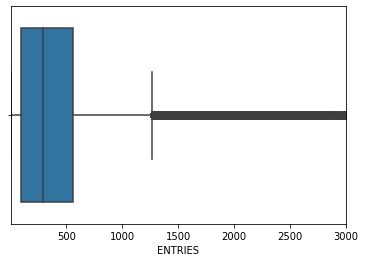

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = MTA_yogunluk['ENTRIES'], ax = ax)
ax.set_xlim(1,3000)
plt.show()

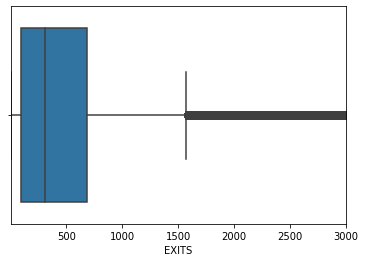

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = MTA_yogunluk['EXITS'], ax = ax)
ax.set_xlim(1,3000)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


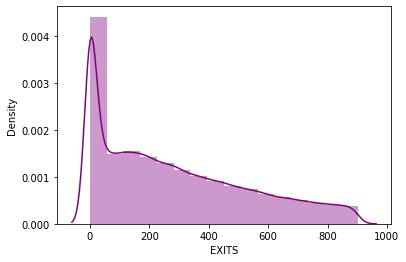

In [ ]:
MTA_filtered = MTA_yogunluk[MTA_yogunluk["EXITS"]<(MTA_yogunluk.ENTRIES.quantile(0.90))]
ax=sns.distplot(MTA_filtered["EXITS"], bins=16, color="PURPLE")

In [ ]:
MTA_yogunluk.describe()

,ENTRIES,EXITS,TRAFFIC,DAYS_INDEX
count,3.521100e+05,3.521100e+05,3.521100e+05,352110.000000
mean,1.277957e+04,2.140303e+04,3.418260e+04,2.999656
std,3.149603e+06,5.431768e+06,7.891186e+06,2.000019
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.200000e+01,9.200000e+01,2.680000e+02,1.000000
50%,2.870000e+02,3.070000e+02,6.820000e+02,3.000000
75%,5.620000e+02,6.830000e+02,1.275000e+03,5.000000
max,1.041558e+09,2.061816e+09,2.798043e+09,6.000000


In [ ]:
MTA_yogunluk.sort_values("TRAFFIC", ascending=False).head(10)

,CA,UNIT,SCP,STATION,DATE,DAYS,ENTRIES,EXITS,TRAFFIC,DAYS_INDEX
305511,R412,R146,00-00-00,HUNTS POINT AV,2022-04-20,Wednesday,926340766,1871702084,2798042850,2
339457,R622,R123,00-00-00,FRANKLIN AV,2022-06-02,Thursday,261891899,2061816028,2323707927,3
168096,N505,R022,02-06-00,34 ST-HERALD SQ,2022-04-13,Wednesday,1041558110,1008051542,2049609652,2
282111,R249,R179,01-00-05,86 ST,2022-04-26,Tuesday,1035961913,348609844,1384571757,1
85076,N043,R186,00-06-01,86 ST,2022-03-30,Wednesday,552346745,552409883,1104756628,2
138872,N310,R140,01-06-00,QUEENS PLAZA,2022-04-03,Sunday,149,1056964673,1056964822,6
339527,R622,R123,00-00-01,FRANKLIN AV,2022-06-02,Thursday,307022914,102038890,409061804,3
138902,N310,R140,01-06-00,QUEENS PLAZA,2022-05-03,Tuesday,21190,251651986,251673176,1
152391,N338,R128,01-06-01,SUTPHIN BLVD,2022-04-18,Monday,84159013,382449,84541462,0
91042,N062A,R010,00-00-05,42 ST-PORT AUTH,2022-04-21,Thursday,17385409,9479775,26865184,3


In [ ]:
MTA_yogunluk = MTA_yogunluk[(MTA_yogunluk.ENTRIES < 22000) & (MTA_yogunluk.EXITS < 22000)]
MTA_yogunluk.head()

,CA,UNIT,SCP,STATION,DATE,DAYS,ENTRIES,EXITS,TRAFFIC,DAYS_INDEX
0,A002,R051,02-00-00,59 ST,2022-03-26,Saturday,142,244,386,5
1,A002,R051,02-00-00,59 ST,2022-03-27,Sunday,110,195,305,6
2,A002,R051,02-00-00,59 ST,2022-03-28,Monday,244,517,761,0
3,A002,R051,02-00-00,59 ST,2022-03-29,Tuesday,329,512,841,1
4,A002,R051,02-00-00,59 ST,2022-03-30,Wednesday,273,535,808,2


In [ ]:
MTA_yogunluk.shape

(351991, 10)

In [ ]:
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

In [ ]:
top_stations = MTA_yogunluk.groupby('STATION')[['TRAFFIC']].agg({'TRAFFIC': 'sum'}).sort_values("TRAFFIC" , ascending = False).head(5)
top_stations.head()

,TRAFFIC
STATION,
34 ST-PENN STA,8230379
GRD CNTRL-42 ST,6771196
34 ST-HERALD SQ,6033382
14 ST-UNION SQ,5411300
86 ST,5330824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

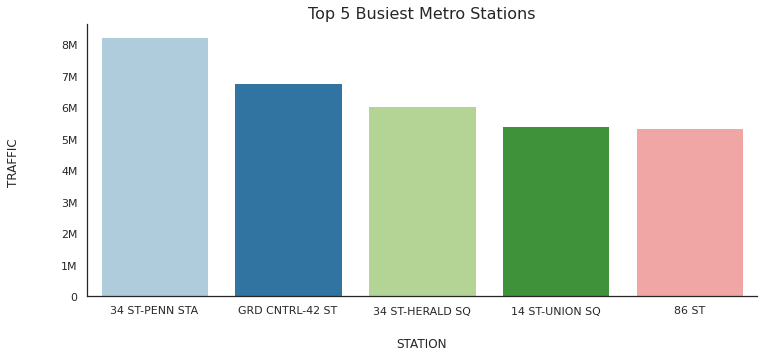

In [ ]:
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = top_stations.index , y = 'TRAFFIC' , data = top_stations , ax = ax, palette = 'Paired'  )
ax.set_title('Top 5 Busiest Metro Stations', fontsize = 16)
ax.set_ylabel('TRAFFIC ' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
from google.colab import files
plt.savefig("top_five.png",bbox_inches="tight")
files.download("top_five.png") 

In [ ]:
top_station_day_index = MTA_yogunluk.groupby(['STATION','DAYS',"DAYS_INDEX"]).agg({'TRAFFIC':'sum'}).reset_index()[["STATION","DAYS","TRAFFIC","DAYS_INDEX"]]
top_station_day_index.head()

,STATION,DAYS,TRAFFIC,DAYS_INDEX
0,1 AV,Friday,235495,4
1,1 AV,Monday,204157,0
2,1 AV,Saturday,156145,5
3,1 AV,Sunday,126722,6
4,1 AV,Thursday,233787,3


In [ ]:
penn = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "34 ST-PENN STA" ].sort_values("DAYS_INDEX",ascending = True)
penn

,STATION,DAYS,TRAFFIC,DAYS_INDEX
428,34 ST-PENN STA,Monday,1200106,0
432,34 ST-PENN STA,Tuesday,1422172,1
433,34 ST-PENN STA,Wednesday,1435371,2
431,34 ST-PENN STA,Thursday,1413478,3
427,34 ST-PENN STA,Friday,1291129,4
429,34 ST-PENN STA,Saturday,798386,5
430,34 ST-PENN STA,Sunday,669737,6


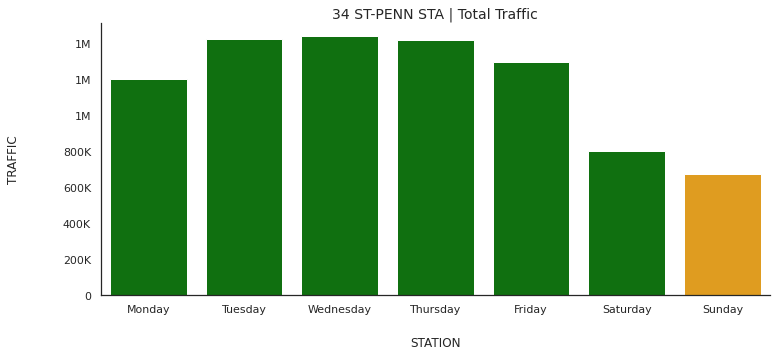

In [ ]:
clrs = [ 'orange' if x < 700000 else 'Green' for x in penn.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = penn.DAYS , y = 'TRAFFIC' , data = penn , ax = ax ,  palette = clrs)
ax.set_title('34 ST-PENN STA | Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
grd = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "GRD CNTRL-42 ST" ].sort_values("DAYS_INDEX",ascending = True)
grd

,STATION,DAYS,TRAFFIC,DAYS_INDEX
1632,GRD CNTRL-42 ST,Monday,1023379,0
1636,GRD CNTRL-42 ST,Tuesday,1230679,1
1637,GRD CNTRL-42 ST,Wednesday,1252391,2
1635,GRD CNTRL-42 ST,Thursday,1223106,3
1631,GRD CNTRL-42 ST,Friday,1028658,4
1633,GRD CNTRL-42 ST,Saturday,566556,5
1634,GRD CNTRL-42 ST,Sunday,446427,6


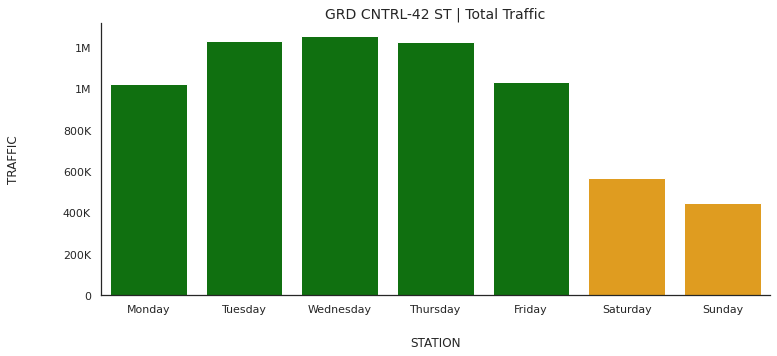

In [ ]:
clrs = [ 'orange' if x < 700000 else 'Green' for x in grd.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = grd.DAYS , y = 'TRAFFIC' , data = grd , ax = ax ,  palette = clrs)
ax.set_title('GRD CNTRL-42 ST | Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
her = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "34 ST-HERALD SQ" ].sort_values("DAYS_INDEX",ascending = True)
her

,STATION,DAYS,TRAFFIC,DAYS_INDEX
414,34 ST-HERALD SQ,Monday,867484,0
418,34 ST-HERALD SQ,Tuesday,964673,1
419,34 ST-HERALD SQ,Wednesday,995277,2
417,34 ST-HERALD SQ,Thursday,991716,3
413,34 ST-HERALD SQ,Friday,962442,4
415,34 ST-HERALD SQ,Saturday,689359,5
416,34 ST-HERALD SQ,Sunday,562431,6


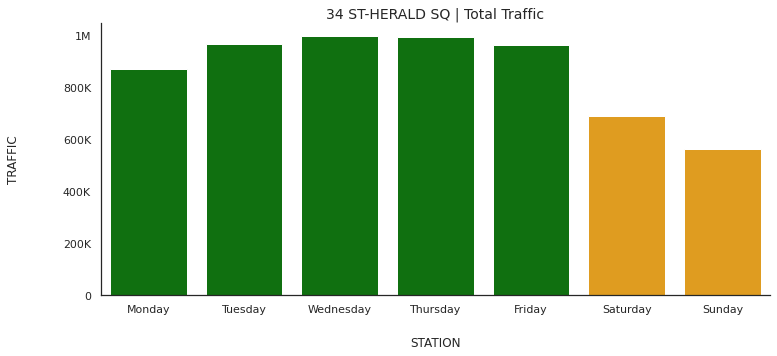

In [ ]:
clrs = [ 'orange' if x < 700000 else 'Green' for x in her.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = her.DAYS , y = 'TRAFFIC' , data = her , ax = ax ,  palette = clrs)
ax.set_title('34 ST-HERALD SQ | Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
st86 = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "86 ST" ].sort_values("DAYS_INDEX",ascending = True)
st86

,STATION,DAYS,TRAFFIC,DAYS_INDEX
771,86 ST,Monday,813951,0
775,86 ST,Tuesday,906665,1
776,86 ST,Wednesday,909558,2
774,86 ST,Thursday,942002,3
770,86 ST,Friday,877951,4
772,86 ST,Saturday,491220,5
773,86 ST,Sunday,389477,6


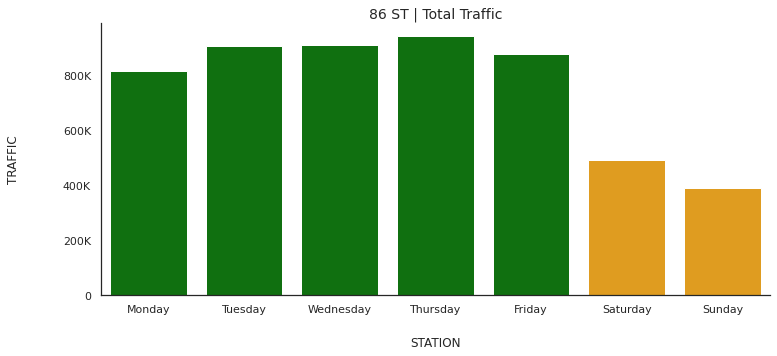

In [ ]:
clrs = [ 'orange' if x < 700000 else 'Green' for x in st86.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = st86.DAYS , y = 'TRAFFIC' , data = st86 , ax = ax ,  palette = clrs)
ax.set_title('86 ST | Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
st23 = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "23 ST" ].sort_values("DAYS_INDEX",ascending = True)
st23

,STATION,DAYS,TRAFFIC,DAYS_INDEX
323,23 ST,Monday,787308,0
327,23 ST,Tuesday,903188,1
328,23 ST,Wednesday,921726,2
326,23 ST,Thursday,921103,3
322,23 ST,Friday,805960,4
324,23 ST,Saturday,503218,5
325,23 ST,Sunday,377081,6


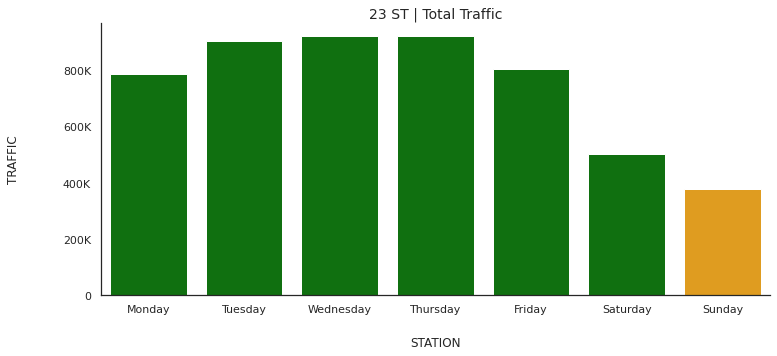

In [ ]:
clrs = [ 'orange' if x < 500000 else 'Green' for x in st23.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = st23.DAYS , y = 'TRAFFIC' , data = st23 , ax = ax ,  palette = clrs)
ax.set_title('23 ST | Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
total_traffic_by_weekday = MTA_yogunluk.groupby(['DAYS', "DAYS_INDEX"]).agg({'TRAFFIC':'sum'}).sort_values("DAYS_INDEX", ascending = True).reset_index()

In [ ]:
total_traffic_by_weekday

,DAYS,DAYS_INDEX,TRAFFIC
0,Monday,0,46159712
1,Tuesday,1,52215814
2,Wednesday,2,53002089
3,Thursday,3,52637218
4,Friday,4,49231976
5,Saturday,5,30572661
6,Sunday,6,24872174


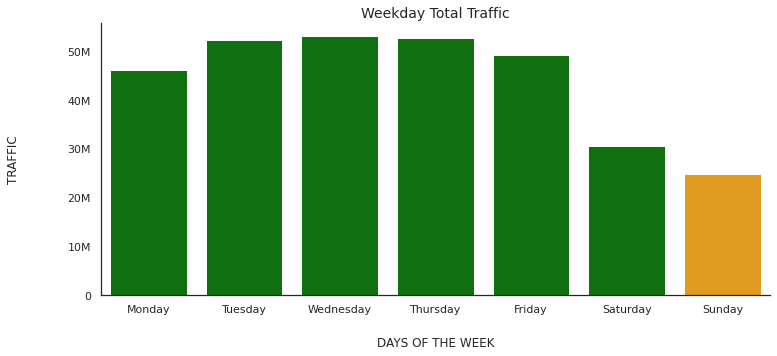

In [ ]:
clrs = [ 'orange' if x < 26000000 else 'Green' for x in total_traffic_by_weekday.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = total_traffic_by_weekday.DAYS , y = 'TRAFFIC' , data = total_traffic_by_weekday , ax = ax ,  palette = clrs)
ax.set_title('Weekday Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('DAYS OF THE WEEK', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
stations = [penn, grd, her ,st86 ,st23]

In [ ]:
top5_line_Data = pd.concat(stations)
top5_line_Data

,STATION,DAYS,TRAFFIC,DAYS_INDEX
428,34 ST-PENN STA,Monday,1200106,0
432,34 ST-PENN STA,Tuesday,1422172,1
433,34 ST-PENN STA,Wednesday,1435371,2
431,34 ST-PENN STA,Thursday,1413478,3
427,34 ST-PENN STA,Friday,1291129,4
429,34 ST-PENN STA,Saturday,798386,5
430,34 ST-PENN STA,Sunday,669737,6
1632,GRD CNTRL-42 ST,Monday,1023379,0
1636,GRD CNTRL-42 ST,Tuesday,1230679,1
1637,GRD CNTRL-42 ST,Wednesday,1252391,2


In [ ]:
def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.1f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

Text(0.5, 1.0, 'Top 5 Stations Total Traffic by WeekDay')

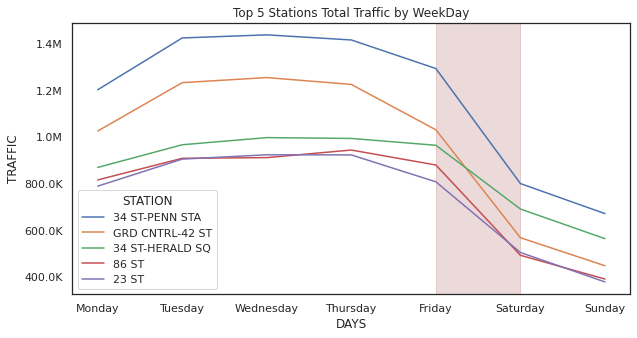

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = top5_line_Data, x= "DAYS", y = "TRAFFIC", hue = "STATION")
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.axvspan("Friday", "Saturday", alpha = 0.15, color = 'maroon')
ax.set_title('Top 5 Stations Total Traffic by WeekDay')